In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load clean dataset
df = pd.read_csv("../player_clean.csv")

# Check shape and a preview
print(df.shape)
df.head()

(570, 48)


,full_name,age,birthday,birthday_gmt,league,season,position,current_club,minutes_played_overall,minutes_played_home,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,birth_year
0,Aaron Cresswell,32,1970-01-01 00:00:00.629712000,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,72,79,1589,1589,0.06,290,191,80,20,1970
1,Aaron Lennon,35,1970-01-01 00:00:00.545554800,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,61,76,1217,1217,0.07,196,187,-1,10,1970
2,Aaron Mooy,32,1970-01-01 00:00:00.653382000,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,51,80,582,2327,0.15,144,233,-1,3,1970
3,Aaron Ramsey,31,1970-01-01 00:00:00.662198400,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,111,47,0,221,0.00,69,8,-1,5,1970
4,Aaron Rowe,22,1970-01-01 00:00:00.968310000,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,69,35,0,0,0.00,-1,-1,-1,31,1970


In [2]:
# Top 10 players by total goals
top_scorers = df.sort_values(by="goals_overall", ascending=False)[
    ["full_name", "current_club", "position", "goals_overall"]
].head(10)

print(top_scorers)

                     full_name       current_club    position  goals_overall
410              Mohamed Salah          Liverpool     Forward             22
453  Pierre-Emerick Aubameyang            Arsenal     Forward             22
487                 Sadio Mané          Liverpool     Forward             22
502              Sergio Aguero    Manchester City     Forward             21
250                Jamie Vardy     Leicester City     Forward             18
215                 Harry Kane  Tottenham Hotspur     Forward             17
457            Raheem Sterling    Manchester City     Forward             17
167                Eden Hazard            Chelsea  Midfielder             16
95               Callum Wilson    AFC Bournemouth     Forward             14
212           Gylfi Sigurdsson            Everton  Midfielder             13


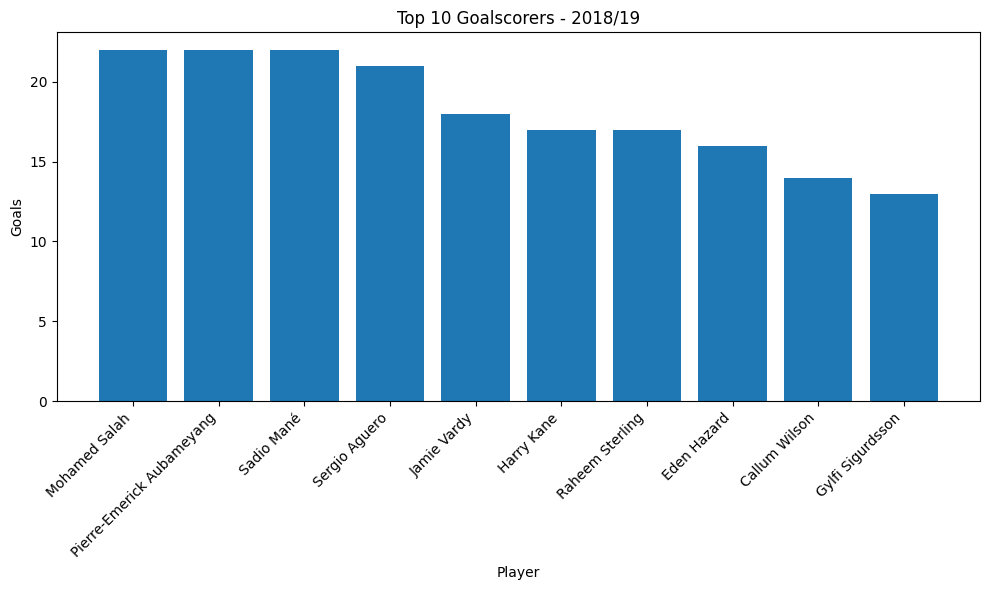

In [3]:
# Bar chart of top 10 goalscorers
plt.figure(figsize=(10, 6))
plt.bar(top_scorers["full_name"], top_scorers["goals_overall"])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Player")
plt.ylabel("Goals")
plt.title("Top 10 Goalscorers - 2018/19")
plt.tight_layout()
plt.show()

In [4]:
# Total goals by nationality
goals_by_nation = df.groupby("nationality")[
    "goals_overall"].sum().sort_values(ascending=False).head(10)

print(goals_by_nation)

nationality
England                297
France                  73
Spain                   65
Brazil                  64
Belgium                 47
Argentina               39
Germany                 35
Portugal                30
Republic of Ireland     25
Netherlands             24
Name: goals_overall, dtype: int64


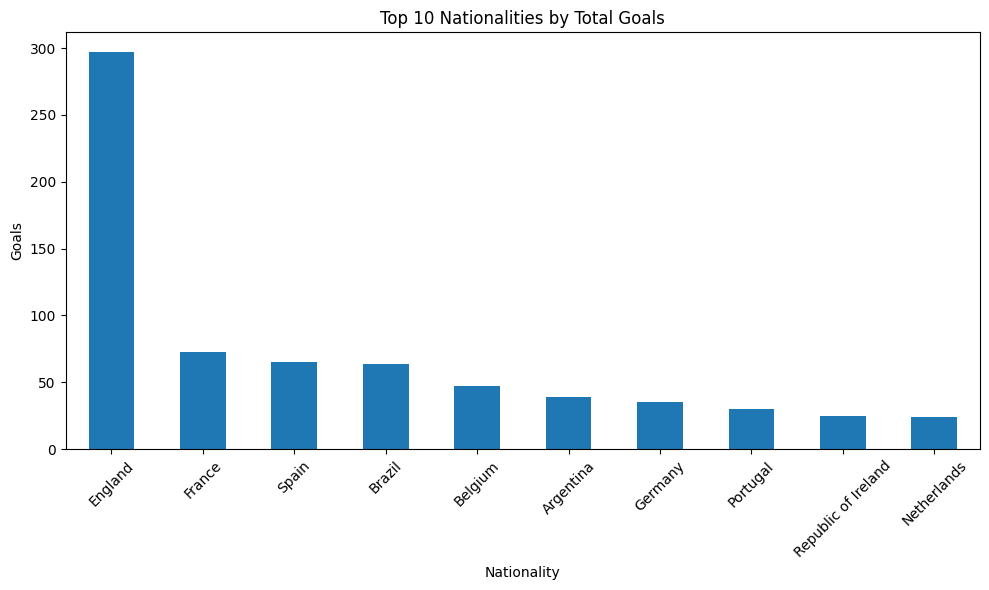

In [5]:
# Bar chart
plt.figure(figsize=(10, 6))
goals_by_nation.plot(kind='bar')
plt.title("Top 10 Nationalities by Total Goals")
plt.ylabel("Goals")
plt.xlabel("Nationality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Avoid divide-by-zero errors
df["goals_per_90"] = df["goals_overall"] / (df["minutes_played_overall"] / 90)
df["goals_per_90"] = df["goals_per_90"].round(2)

In [7]:
efficient_scorers = df[df["minutes_played_overall"] >= 900].sort_values(
    by="goals_per_90", ascending=False
)[["full_name", "current_club", "goals_overall", "minutes_played_overall", "goals_per_90"]].head(10)

print(efficient_scorers)

                     full_name       current_club  goals_overall  \
502              Sergio Aguero    Manchester City             21   
453  Pierre-Emerick Aubameyang            Arsenal             22   
487                 Sadio Mané          Liverpool             22   
215                 Harry Kane  Tottenham Hotspur             17   
199              Gabriel Jesus    Manchester City              7   
410              Mohamed Salah          Liverpool             22   
250                Jamie Vardy     Leicester City             18   
55             Anthony Martial  Manchester United             10   
457            Raheem Sterling    Manchester City             17   
475         Ruben Loftus-Cheek            Chelsea              6   

     minutes_played_overall  goals_per_90  
502                    2480          0.76  
453                    2731          0.73  
487                    3086          0.64  
215                    2427          0.63  
199                    1019    

In [8]:
# U21 players
u21_players = df[df["age"] <= 21]

# Top U21 by goals
top_u21 = u21_players.sort_values(by="goals_overall", ascending=False)[
    ["full_name", "age", "current_club", "goals_overall", "goals_per_90"]
].head(10)

print(top_u21)

              full_name  age       current_club  goals_overall  goals_per_90
91   Callum Hudson-Odoi   21            Chelsea              0           0.0
125        Curtis Jones   21          Liverpool              0           NaN
241        James Garner   21  Manchester United              0           NaN
379     Mason Greenwood   21  Manchester United              0           0.0
393          Matty Daly   21  Huddersfield Town              0           0.0


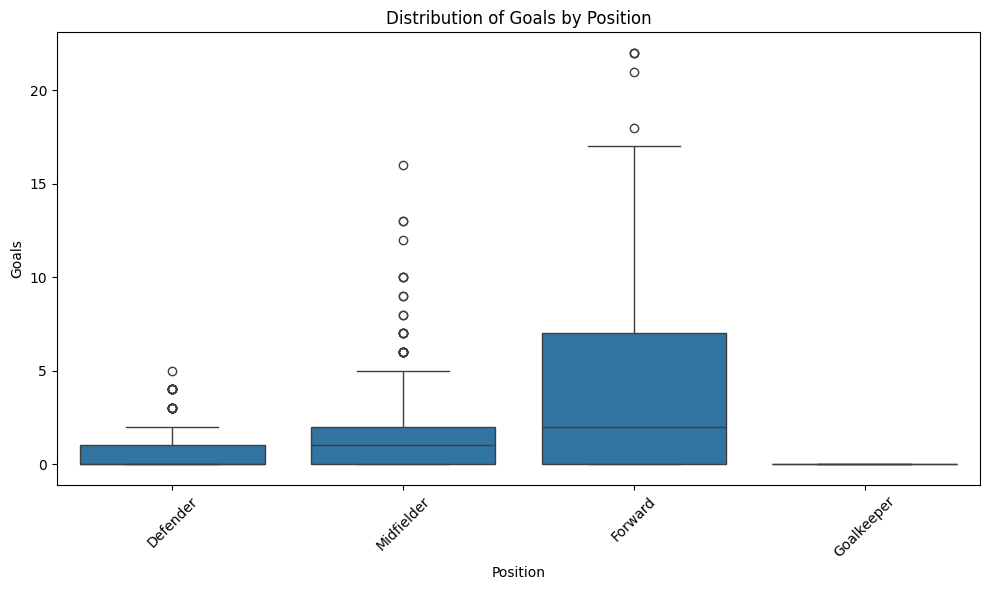

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="position", y="goals_overall")
plt.title("Distribution of Goals by Position")
plt.ylabel("Goals")
plt.xlabel("Position")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()